# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import files
uploaded = files.upload()

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [ ]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

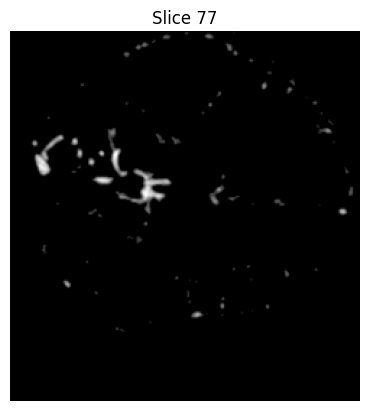

In [5]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [7]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

154

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(241.5), np.float64(255.5), np.float64(-0.5))

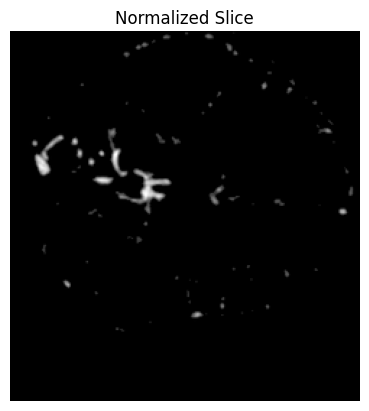

In [8]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

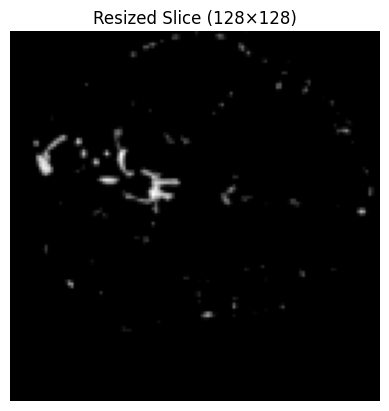

In [10]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [11]:
file_path = 'C:\\DS-AI-ML\\Brain_Tumor_Segmentation_BCP\\Week_2\\Python_libraries\\Nibabel\\CT_AVM.nii.gz'
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


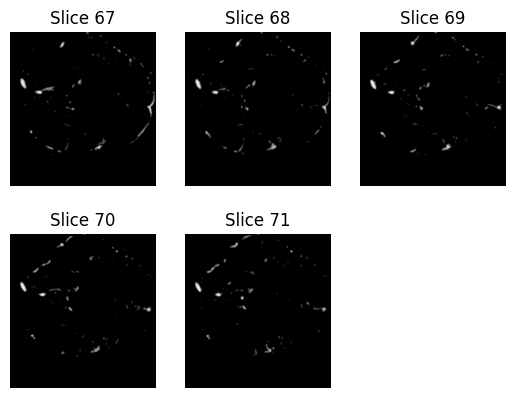

In [13]:
for i in range(67,72):
    slice_index = i
    plt.subplot(2,3,i-66)
    plt.imshow(mri[:, :, slice_index], cmap='gray')
    plt.title(f'Slice {slice_index}')
    plt.axis('off')

In [37]:
def plot_slides(volume,indices):
    sub=1
    for i in indices:
        slice_index = i
        plt.subplot(len(indices),1,sub)
        plt.imshow(volume[:, :, slice_index], cmap='gray')
        plt.title(f'Slice {slice_index}')
        sub+=1
        plt.axis('off')

In [35]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)


<module 'matplotlib.pyplot' from 'C:\\Users\\shudd\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

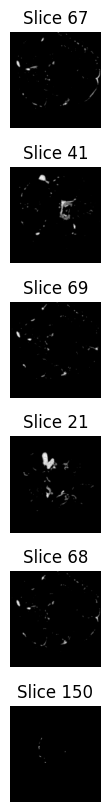

In [39]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plot_slides(mri,[67,41,69,21,68,150])
plt.show()